In [39]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV # train_test_split用于数据集分割成训练集和测试集，GridSearchCV是用于模型选择和超参数调优的工具
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats# 统计方法，卡方检验

In [40]:
customers_data = pd.read_csv("D:\\Anaconda3\\pythoncode\\bankchurners\\BankChurners.csv")
customers_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [41]:
print("缺失值个数: ",customers_data.duplicated().sum())
print("重复值个数:\n",customers_data.isna().sum())
print("数据集信息:\n",customers_data.info())

缺失值个数:  0
重复值个数:
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category               

In [42]:
# 将流失情况用布尔值表示，0表示未流失，1表示流失
customers_data.loc[customers_data["Attrition_Flag"] == "Existing Customer", "Attrition_Flag"] = 0
customers_data.loc[customers_data["Attrition_Flag"] == "Attrited Customer", "Attrition_Flag"] = 1
customers_data.head(30)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
5,713061558,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940
6,810347208,0,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
7,818906208,0,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
8,710930508,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.999960
9,719661558,0,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.999700


In [43]:
# 将流失情况的数据类型改为布尔型
customers_data['Attrition_Flag'] = customers_data['Attrition_Flag'].astype('int64')
# CLIENTNUM数据类型改为字符类型
customers_data['CLIENTNUM'] = customers_data['CLIENTNUM'].astype('str')
print(customers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  object 
 1   Attrition_Flag                                                                                                                      10127 non-null  int64  
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [44]:
# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

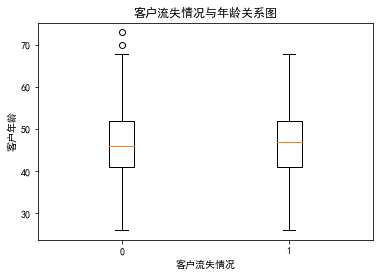

总客户数: 10127
流失客户数: 1628


In [45]:
# 客户流失与年龄的关系
x1 = customers_data['Attrition_Flag']
y1 = customers_data['Customer_Age']
plt.boxplot([y1[x1 == 0], y1[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户年龄')
plt.title('客户流失情况与年龄关系图')
plt.show()
print("总客户数:", customers_data.shape[0])
print("流失客户数:", x1.sum())

       Attrition_Flag       Churn_Rate
                  sum count           
Gender                                
F                 930  5358   0.173572
M                 698  4769   0.146362


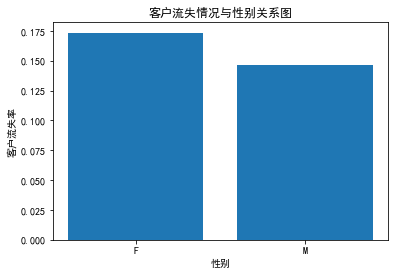

In [46]:
# 客户流失与性别的关系
gender_group = customers_data.groupby('Gender').agg({'Attrition_Flag': ['sum', 'count']})# 使用聚合函数对每个组进行操作。这里针对“Attrition_Flag”列分别计算“sum”（总和）和“count”（数量）
gender_group['Churn_Rate'] = gender_group[('Attrition_Flag','sum')] / gender_group[('Attrition_Flag', 'count')]# 计算每个性别组的流失率。通过用“Attrition_Flag”列的总和除以数量，得到流失率的值
print(gender_group)
plt.bar(gender_group.index, gender_group['Churn_Rate'])
plt.xlabel('性别')
plt.ylabel('客户流失率')
plt.title('客户流失情况与性别关系图')
plt.show()

                Attrition_Flag       Churn_Rate
                           sum count           
Education_Level                                
College                    154  1013   0.152024
Doctorate                   95   451   0.210643
Graduate                   488  3128   0.156010
High School                306  2013   0.152012
Post-Graduate               92   516   0.178295
Uneducated                 237  1487   0.159381


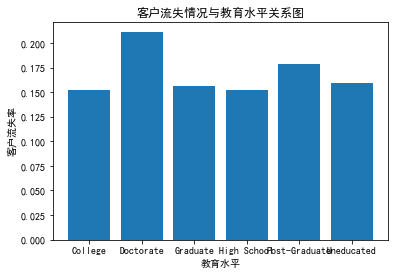

In [47]:
# 客户流失与教育水平的关系
edu_group = customers_data.groupby('Education_Level').agg({'Attrition_Flag': ['sum', 'count']})
edu_group['Churn_Rate'] = edu_group[('Attrition_Flag', 'sum')] / edu_group[('Attrition_Flag', 'count')]
edu_group = edu_group.drop(index = ['Unknown'])
print(edu_group)
plt.bar(edu_group.index, edu_group['Churn_Rate'])
plt.xlabel('教育水平')
plt.ylabel('客户流失率')
plt.title('客户流失情况与教育水平关系图')
plt.show()

               Attrition_Flag       Churn_Rate
                          sum count           
Marital_Status                                
Divorced                  121   748   0.161765
Married                   710  4687   0.151483
Single                    668  3943   0.169414


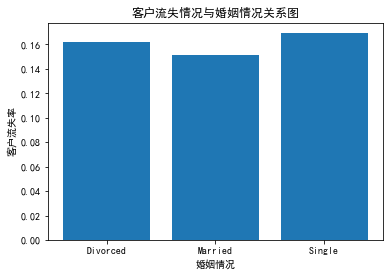

In [48]:
# 客户流失与婚姻情况的关系
maried_group = customers_data.groupby('Marital_Status').agg({'Attrition_Flag': ['sum', 'count']})# 使用聚合函数对每个组进行操作。这里针对“Attrition_Flag”列分别计算“sum”（总和）和“count”（数量）
maried_group['Churn_Rate'] = maried_group[('Attrition_Flag','sum')] / maried_group[('Attrition_Flag', 'count')]# 计算每个性别组的流失率。通过用“Attrition_Flag”列的总和除以数量，得到流失率的值
maried_group = maried_group.drop(index = ['Unknown'])
print(maried_group)
plt.bar(maried_group.index, maried_group['Churn_Rate'])
plt.xlabel('婚姻情况')
plt.ylabel('客户流失率')
plt.title('客户流失情况与婚姻情况关系图')
plt.show()

              Attrition_Flag       Churn_Rate
                         sum count           
Card_Category                                
Blue                    1520  9436   0.161085
Gold                      21   116   0.181034
Platinum                   5    20   0.250000
Silver                    82   555   0.147748


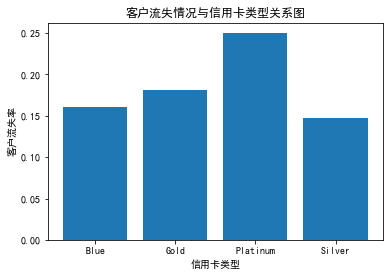

In [49]:
# 客户流失与信用卡类型的关系
card_group = customers_data.groupby('Card_Category').agg({'Attrition_Flag': ['sum', 'count']})
card_group['Churn_Rate'] = card_group[('Attrition_Flag', 'sum')] / card_group[('Attrition_Flag', 'count')]
print(card_group)
plt.bar(card_group.index, card_group['Churn_Rate'])
plt.xlabel('信用卡类型')
plt.ylabel('客户流失率')
plt.title('客户流失情况与信用卡类型关系图')
plt.show()

                Attrition_Flag       Churn_Rate
                           sum count           
Dependent_count                                
0                          135   904   0.149336
1                          269  1838   0.146355
2                          418  2655   0.157439
3                          482  2732   0.176428
4                          260  1574   0.165184
5                           64   424   0.150943


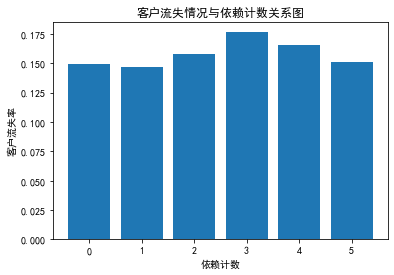

In [50]:
# 客户流失与依赖计数的关系
dep_group = customers_data.groupby('Dependent_count').agg({'Attrition_Flag': ['sum', 'count']})
dep_group['Churn_Rate'] = dep_group[('Attrition_Flag', 'sum')] / dep_group[('Attrition_Flag', 'count')]
print(dep_group)
plt.bar(dep_group.index, dep_group['Churn_Rate'])
plt.xlabel('依赖计数')
plt.ylabel('客户流失率')
plt.title('客户流失情况与依赖计数关系图')
plt.show()

                Attrition_Flag       Churn_Rate
                           sum count           
Income_Category                                
$120K +                    126   727   0.173315
$40K - $60K                272  1790   0.151955
$60K - $80K                189  1402   0.134807
$80K - $120K               242  1535   0.157655
Less than $40K             612  3561   0.171862


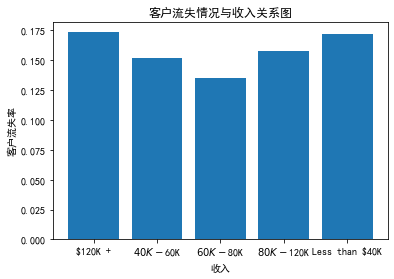

In [51]:
# 客户流失与收入的关系
inc_group = customers_data.groupby('Income_Category').agg({'Attrition_Flag': ['sum', 'count']})
inc_group['Churn_Rate'] = inc_group[('Attrition_Flag', 'sum')] / inc_group[('Attrition_Flag', 'count')]
inc_group = inc_group.drop(index = ['Unknown'])
print(inc_group)
plt.bar(inc_group.index, inc_group['Churn_Rate'])
plt.xlabel('收入')
plt.ylabel('客户流失率')
plt.title('客户流失情况与收入关系图')
plt.show()

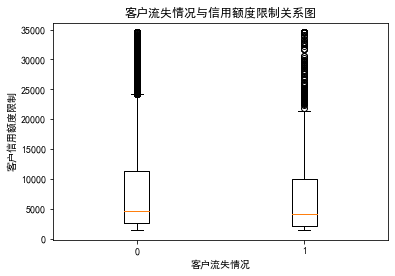

In [52]:
y2 = customers_data['Credit_Limit']
plt.boxplot([y2[x1 == 0], y2[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户信用额度限制')
plt.title('客户流失情况与信用额度限制关系图')
plt.show()

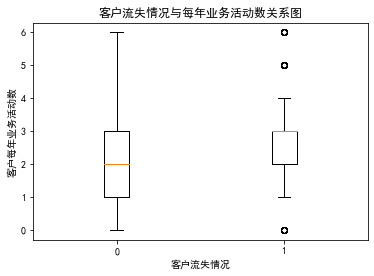

In [53]:
# 客户流失情况与每年业务活动数的关系
y3 = customers_data['Months_Inactive_12_mon']
plt.boxplot([y3[x1 == 0], y3[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户每年业务活动数')
plt.title('客户流失情况与每年业务活动数关系图')
plt.show()

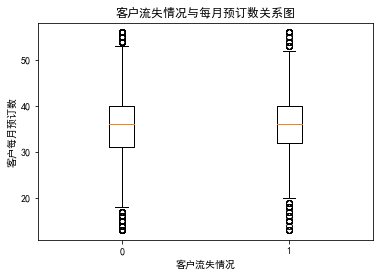

In [54]:
# 客户流失情况与每月预订数的关系
y4 = customers_data['Months_on_book']
plt.boxplot([y4[x1 == 0], y4[x1 == 1]])
plt.xticks([1, 2], ['0', '1'])  # 指定横坐标位置和对应标签
plt.xlabel('客户流失情况')
plt.ylabel('客户每月预订数')
plt.title('客户流失情况与每月预订数关系图')
plt.show()

,Feature,Corr
0,Attrition_Flag,1.000000
15,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,0.999623
6,Contacts_Count_12_mon,0.204329
5,Months_Inactive_12_mon,0.152054
2,Dependent_count,0.018914
1,Customer_Age,0.018121
3,Months_on_book,0.013686
9,Avg_Open_To_Buy,-0.000424
7,Credit_Limit,-0.024004
10,Total_Amt_Chng_Q4_Q1,-0.130275


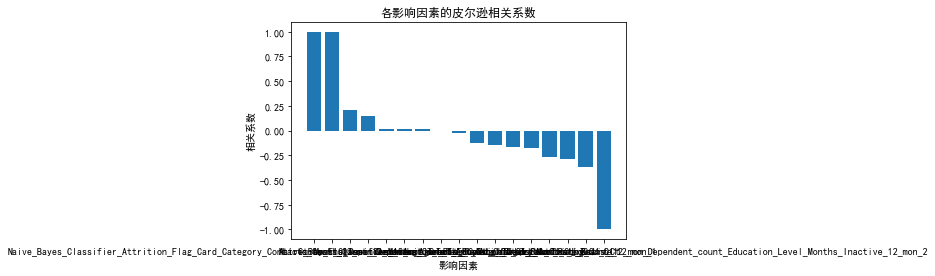

In [60]:
# 计算皮尔逊相关系数
num_df = df.select_dtypes(include=np.number)
corr_mar = num_df.corr()# 计算数据框各列之间的皮尔逊相关系数
corr_df = pd.DataFrame({'Corr':corr_mar['Attrition_Flag']}).reset_index().sort_values('Corr', ascending=False).rename(columns={'index':'Feature'})
display(corr_df)
F = corr_df['Feature']
C = corr_df['Corr']
plt.bar(F,C)
plt.xlabel('影响因素')
plt.ylabel('相关系数')
plt.title('各影响因素的皮尔逊相关系数')
plt.show()

In [73]:
df = customers_data.drop(labels=['CLIENTNUM', 'Months_on_book', 'Avg_Open_To_Buy','Dependent_count','Customer_Age','Avg_Open_To_Buy','Credit_Limit'],  axis=1)
df = df[df.columns[:-2]]
df

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061
1,0,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105
2,0,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000
3,0,F,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760
4,0,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,M,Graduate,Single,$40K - $60K,Blue,3,2,3,1851,0.703,15476,117,0.857,0.462
10123,1,M,Unknown,Divorced,$40K - $60K,Blue,4,2,3,2186,0.804,8764,69,0.683,0.511
10124,1,F,High School,Married,Less than $40K,Blue,5,3,4,0,0.819,10291,60,0.818,0.000
10125,1,M,Graduate,Unknown,$40K - $60K,Blue,4,3,3,0,0.535,8395,62,0.722,0.000


In [127]:
features

,Gender,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,2,70000,5,1,3,777,1.335,1144,42,1.625,0.061
1,0,4,20000,6,1,2,864,1.541,1291,33,3.714,0.105
2,1,4,100000,4,1,0,0,2.594,1887,20,2.333,0.000
3,0,2,20000,3,4,1,2517,1.405,1171,20,2.333,0.760
4,1,1,70000,5,1,0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,4,50000,3,2,3,1851,0.703,15476,117,0.857,0.462
10123,1,0,50000,4,2,3,2186,0.804,8764,69,0.683,0.511
10124,0,2,20000,5,3,4,0,0.819,10291,60,0.818,0.000
10125,1,4,50000,4,3,3,0,0.535,8395,62,0.722,0.000


In [74]:
# 卡方检验(分类变量)
def chi_square(data, features):
    results = pd.DataFrame(columns=['Feature', 'Chi_square', 'P_value'])
    for feature in features:
        crosstab = pd.crosstab(data[feature], data['Attrition_Flag'])  # 创建列联表
        chi_square, p_value, dof, expected = stats.chi2_contingency(crosstab)  # 计算卡方值和p值
        row = {'Feature': feature, 'Chi_square': chi_square, 'P_value': p_value}
        results = results.append(row, ignore_index=True)
    return results

# 使用新的特征列表
features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
            'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

chi_df = chi_square(df, features)
display(chi_df)


,Feature,Chi_square,P_value
0,Gender,13.646044,2.207058e-04
1,Education_Level,12.432967,5.297819e-02
2,Marital_Status,5.914738,1.158329e-01
3,Income_Category,12.691979,2.644274e-02
4,Card_Category,2.237909,5.245202e-01
5,Total_Relationship_Count,284.119789,2.593107e-59
6,Months_Inactive_12_mon,394.544108,4.162359e-82
7,Contacts_Count_12_mon,585.818342,2.670328e-123
8,Total_Revolving_Bal,2896.086668,2.626065e-38
9,Total_Amt_Chng_Q4_Q1,1708.635861,5.009630e-24


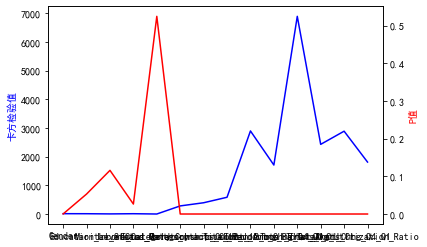

In [75]:
# 绘制卡方检验值和P值的折线图
fig, fig_chi = plt.subplots()# 创建图表，并设置一个主坐标轴对象
fig_fea = chi_df['Feature']# 提取横坐标环境因素
data_chi = chi_df['Chi_square']
data_p = chi_df['P_value']# 提取数据
line1 = fig_chi.plot(fig_fea, data_chi, color='b')# 绘制卡方检验值的折线
fig_chi.set_ylabel('卡方检验值', color='b')
fig_p = fig_chi.twinx()# 创建共享横坐标的右边纵坐标fig_p
line2 = fig_p.plot(fig_fea, data_p, color='r')
fig_p.set_ylabel('P值', color='r')
plt.xlabel('Features')
plt.show()

In [106]:
df = customers_data.drop(labels=['Marital_Status','Card_Category'],axis=1)

In [118]:
# 客户细分(K均值聚类算法)
df_kmeans = df.copy(deep=True)
df_kmeans['Gender'] = df_kmeans['Gender'].map({'M': 1, 'F': 0})
df_kmeans['Education_Level'] = df_kmeans['Education_Level'].map({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})
# df_kmeans['Marital_Status'] = df_kmeans['Marital_Status'].map({'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3})
df_kmeans['Income_Category'] = df_kmeans['Income_Category'].map({'Unknown': 72000, 'Less than $40K': 20000, '$40K - $60K': 50000, '$60K - $80K': 70000, '$80K - $120K': 100000, '$120K +': 120000})
# df_kmeans['Card_Category'] = df_kmeans['Card_Category'].map({'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3})
# 选择一些合适的连续变量特征
features = df_kmeans[['Gender', 'Education_Level', 'Income_Category',
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
            'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
# 进行数据标准化处理，减少数据之间误差
scaler = StandardScaler()
scaler_features = scaler.fit_transform(features)
# 创建聚类算法对象,并训练
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaler_features)
# 将聚类结果添加到df数据框里
df_kmeans['Clusters'] = clusters
display(df_kmeans[['Attrition_Flag', 'Clusters']].head())

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Attrition_Flag,Clusters
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [119]:
    # 对客户群体进行分析各其特征和流失率
clusters_analysis = df_kmeans.groupby(by='Clusters').agg(
    {'Gender':'mean', 'Education_Level':'mean',  'Income_Category':'mean', 
            'Total_Relationship_Count':'mean', 'Months_Inactive_12_mon':'mean', 'Contacts_Count_12_mon':'mean', 
            'Total_Revolving_Bal':'mean', 'Total_Amt_Chng_Q4_Q1':'mean', 'Total_Trans_Amt':'mean', 'Total_Trans_Ct':'mean', 
            'Total_Ct_Chng_Q4_Q1':'mean', 'Avg_Utilization_Ratio':'mean','Attrition_Flag':'mean'}
).reset_index().round(2)
display(clusters_analysis)

,Clusters,Gender,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,1.00,2.60,82760.22,3.81,2.33,2.50,1174.92,0.77,4520.45,63.28,0.71,0.19,0.15
1,1,0.02,2.61,35606.64,3.81,2.35,2.42,1152.55,0.75,4305.45,66.19,0.71,0.35,0.17


In [120]:
df_kmeans

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Clusters
0,768805383,0,45,1,3,2,70000,39,5,1,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,0,49,0,5,4,20000,44,6,1,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,0,51,1,3,4,100000,36,4,1,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,0,40,0,4,2,20000,34,3,4,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,0,40,1,3,1,70000,21,5,1,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,4,50000,40,3,2,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,1,41,1,2,0,50000,25,4,2,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,1,44,0,1,2,20000,36,5,3,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1
10125,717406983,1,30,1,2,4,50000,36,4,3,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


In [128]:
# GradientBoostingClassifier梯度提升算法
df_gdbt = df_kmeans[df_kmeans.columns[:-3]]
df = customers_data.drop(labels=['CLIENTNUM', 'Months_on_book', 'Avg_Open_To_Buy','Dependent_count','Customer_Age','Avg_Open_To_Buy','Credit_Limit'],  axis=1)
# 特征重要性分析
target = df_gdbt[['Attrition_Flag']]
df_gdbt = df_gdbt.drop(labels=['Attrition_Flag'], axis=1)
display(df_gdbt)
df_gdbt.info()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,2,70000,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,4,20000,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,4,100000,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,2,20000,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,1,70000,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,4,50000,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,1,2,0,50000,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,0,1,2,20000,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,1,2,4,50000,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [129]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(df_gdbt, target, test_size=0.2, random_state=42)
# 构建模型
gbdt = GradientBoostingClassifier()
# 训练模型
gbdt.fit(x_train, y_train)
# 返回各个特征的重要性，数值越大，特征越重要
importances = gbdt.feature_importances_
# 将这个特征重要性以图表形式可视化显示
importances_df = pd.DataFrame(importances, index=df_gdbt.columns, columns=['importance'])
# 按特征重要性降序排列
importances_df = importances_df.sort_values(by='importance', ascending=False)
display(importances_df)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,importance
Total_Trans_Ct,0.340182
Total_Trans_Amt,0.203568
Total_Revolving_Bal,0.167944
Total_Ct_Chng_Q4_Q1,0.108887
Total_Relationship_Count,0.085166
Total_Amt_Chng_Q4_Q1,0.033856
Customer_Age,0.018762
Months_Inactive_12_mon,0.016252
Contacts_Count_12_mon,0.015677
Gender,0.003252


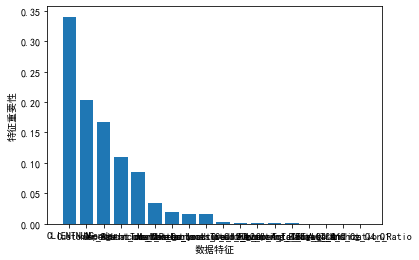

梯度提升决策树准确度: 0.9674234945705824
其他指标：
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.95      0.85      0.89       327

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [130]:
# 画柱状图
plt.bar(df_gdbt.columns, importances_df['importance'])
plt.xlabel('数据特征')
plt.ylabel('特征重要性')
plt.show()
# 在测试集上进行预测
y_pred = gbdt.predict(x_test)
print("梯度提升决策树准确度:", gbdt.score(x_test, y_test))
print("其他指标：\n", classification_report(y_test, y_pred))

In [131]:
# 创建 GBDT 模型
gbdt1 = GradientBoostingClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
 
# 创建 GridSearchCV 对象
y_train1 = y_train.values.ravel()
grid_search = GridSearchCV(gbdt1, parameters, cv=5)
grid_search.fit(x_train,y_train1)
 
# 获取最佳参数
best_params = grid_search.best_params_
print('Best Parameters Found:',best_params)

Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [132]:
best_gbdt = GradientBoostingClassifier(**best_params)
# 训练模型
best_gbdt.fit(x_train, y_train)
# 在测试集上进行预测
y_pred = best_gbdt.predict(x_test)
# 在测试集上评估最终模型
test_score = best_gbdt.score(x_test, y_test)
print("最优参数下的梯度提升决策树准确度:", test_score)
print("其他指标：\n", classification_report(y_test, y_pred))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


最优参数下的梯度提升决策树准确度: 0.9674234945705824
其他指标：
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.93      0.86      0.89       327

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026

